In [1]:
import pandas as pd

In [2]:
# Wczytuję dane do ramki danych, ale pomijam 4 pierwsze wiersze z pliku csv, 
# ponieważ interesują nas tylko poniższe informacje.
data_nyc = pd.read_csv("data.csv", skiprows=range(0,4) )

In [3]:
data_nyc

,Date,Value,Anomaly
0,195301,36.9,3.2
1,195401,29.9,-3.8
2,195501,30.0,-3.7
3,195601,31.3,-2.4
4,195701,27.8,-5.9
...,...,...,...
61,201401,28.7,-5.0
62,201501,30.0,-3.7
63,201601,34.5,0.8
64,201701,38.1,4.4


In [4]:
# Zmiana nazw kolumn na ich polskie odpowiedniki
data_nyc.columns = ['Data', 'Temperatura', 'Odchylka']

In [5]:
data_nyc.describe()

,Data,Temperatura,Odchylka
count,66.000000,66.000000,66.000000
mean,198551.000000,31.895455,-1.806061
std,1919.635382,4.433524,4.433643
min,195301.000000,21.600000,-12.100000
25%,196926.000000,28.825000,-4.875000
50%,198551.000000,31.600000,-2.100000
75%,200176.000000,34.850000,1.150000
max,201801.000000,41.100000,7.400000


In [6]:
# Zmiana wartości danych w kolumnach Temperatura i Odchylka związana ze zmianą stopni z Fahrenheit na stopnie Celsjusza.
# Wykorzystując podane w pliku wyrażenie lambda, po kolei wszystkie wartości z odpowiedniej kolumny podlegają 
# zamianie według podanego niżej działania. 

data_nyc['Temperatura'] = data_nyc.Temperatura.apply(lambda f: round(5/9 * (f-32), 2))
data_nyc['Odchylka'] = data_nyc.Odchylka.apply(lambda f: round(5/9 * (f-32), 2))

In [7]:
# W celu sprawdzenia, czy zmiana dokonała się prawidłowo, ponownie wywołuję ramkę danych. 
# Jak widać poniżej zmiana przeszła pomyślnie, więc można przejść do dalszych obliczeń.

data_nyc

,Data,Temperatura,Odchylka
0,195301,2.72,-16.00
1,195401,-1.17,-19.89
2,195501,-1.11,-19.83
3,195601,-0.39,-19.11
4,195701,-2.33,-21.06
...,...,...,...
61,201401,-1.83,-20.56
62,201501,-1.11,-19.83
63,201601,1.39,-17.33
64,201701,3.39,-15.33


In [8]:
data_nyc.describe()

,Data,Temperatura,Odchylka
count,66.000000,66.000000,66.000000
mean,198551.000000,-0.057273,-18.780758
std,1919.635382,2.463417,2.463479
min,195301.000000,-5.780000,-24.500000
25%,196926.000000,-1.765000,-20.485000
50%,198551.000000,-0.220000,-18.940000
75%,200176.000000,1.582500,-17.137500
max,201801.000000,5.060000,-13.670000


In [9]:
from scipy import stats

In [10]:
# Do zmiennej niezależnej x przypisuję wartości Daty- styczeń każdego roku zaczynając od 1953 do 2018 roku.
# Do zmiennej zależnej y przypisuję wartości z kolumny Temperatura. 

x = data_nyc.Data
y = data_nyc.Temperatura

In [11]:
# Obliczam regresję liniową 
linear_regression = stats.linregress(x, y)

In [12]:
# nachylenie linii regresji
linear_regression.slope

0.00036585742615593354

In [13]:
# przesunięcie linii regresji 
linear_regression.intercept

-72.6986305479595

In [14]:
# oblicznenie prognozowanej średniej temperatury styczniowej w mieście New York na 2022 rok
linear_regression.slope * 202201 + linear_regression.intercept

1.278106878196425

In [17]:
# Standard error
linear_regression.stderr

0.00015375197684655892

In [15]:
import matplotlib.pyplot as plt

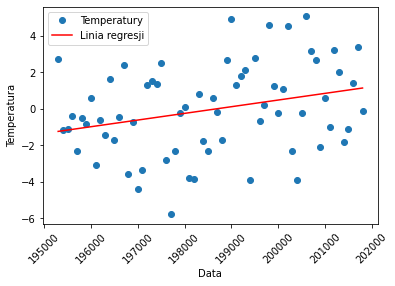

In [16]:
# wykres pokazujący regresję liniową
plt.plot(x, y, 'o', label='Temperatury')
plt.xlabel('Data')
plt.xticks(rotation=45)
plt.ylabel('Temperatura')
plt.plot(x, linear_regression.intercept + linear_regression.slope* x, 'r', label='Linia regresji')
plt.legend()
plt.show()